This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a valid equation of state
This is a vali

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mass Radius file will be generated and stored as MassRadius.csv, and the 2-d array. The first column is Radius, second one is mass


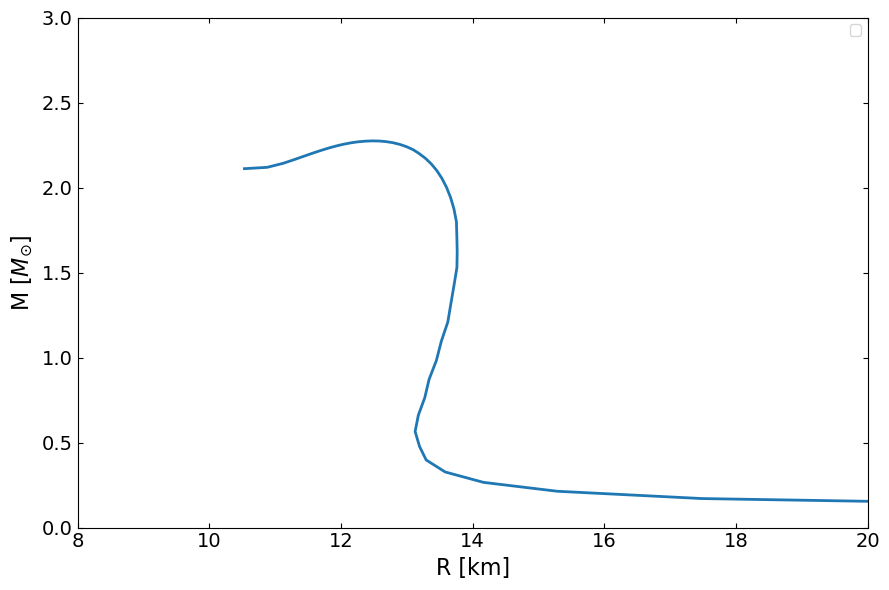

In [9]:
import TOVsolver.main as main
import TOVsolver.EoS_import as EoS_import
from matplotlib import pyplot
import matplotlib.pyplot as plt
import TOVsolver.constant
from itertools import repeat
import numpy
# Main has two functions
#   Output.MRT() returns the mass, radius, tidal
#   OutputC_s() returns the speed of sound
# Using the main functions with either arrays of density and pressure or a .csv with density and pressure columns
#   Function argument is either (filename = ) OR (density = , pressure = )
#   Example: main.OutputMR(filename = 'file.csv') OR main.OutputMR(density = array1, pressure = array2)
MRT = main.OutputMRT("Test_EOS.csv").T
# Plot the Mass-Radius curve
fig, ax = plt.subplots(1,1, figsize=(9,6))
ax.plot(MRT[0], MRT[1],lw=2)
ax.set_ylabel(r'M [$M_{\odot}$]', fontsize=16)
ax.set_xlabel('R [km]', fontsize=16)
ax.set_xlim(8., 20.)
ax.set_ylim(0,3)
ax.legend()
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
fig.tight_layout()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


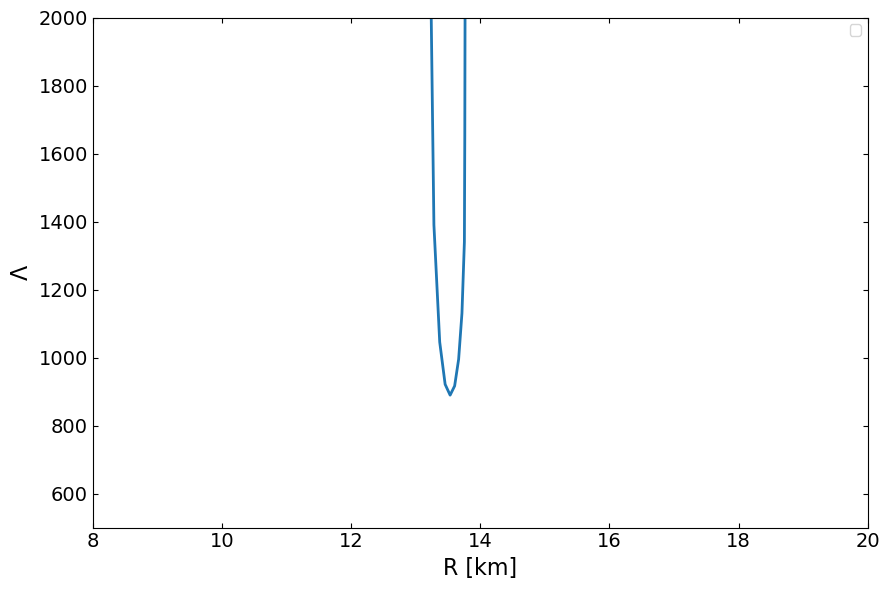

In [21]:
# Plot the Radius and Tidal curve
fig, ax = plt.subplots(1,1, figsize=(9,6))
tidal = []
mass = []
radius = []
for i in range(len(MRT[1])):
    if MRT[2][i] < 0:
        tidal.append(numpy.abs(MRT[2][i]))
        mass.append(MRT[1][i])
        radius.append(MRT[0][i])
        
ax.plot(radius, tidal,lw=2)
ax.set_ylabel(r'$\Lambda$', fontsize=16)
ax.set_xlabel('R [km]', fontsize=16)
ax.set_xlim(8., 20.)
ax.set_ylim(500,2000)
ax.legend()
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
fig.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


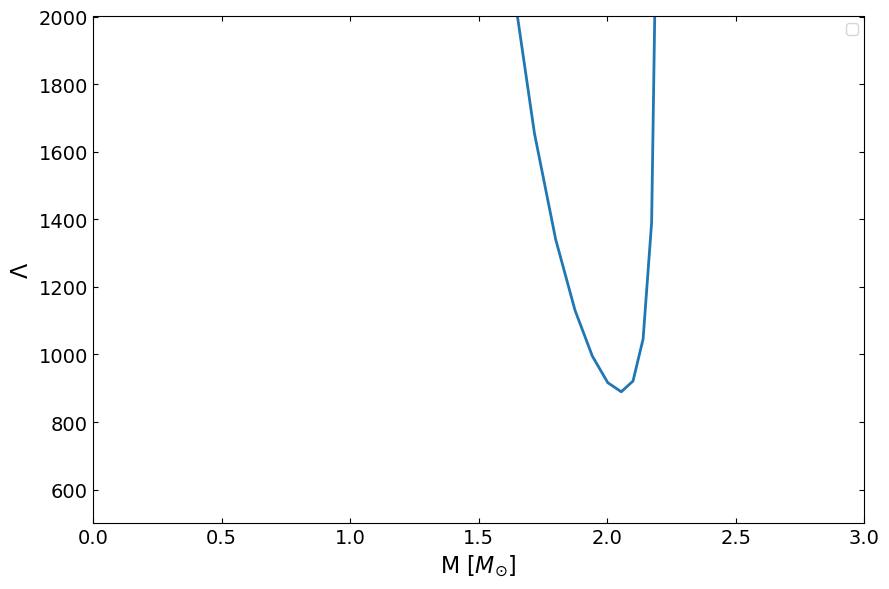

In [20]:
# Plot the Mass and Tidal curve
fig, ax = plt.subplots(1,1, figsize=(9,6))
ax.plot(mass, tidal,lw=2)
ax.set_ylabel(r'$\Lambda$', fontsize=16)
ax.set_xlabel(r'M [$M_{\odot}$]', fontsize=16)
ax.set_xlim(0., 3.)
ax.set_ylim(500,2000)
ax.legend()
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
fig.tight_layout()
plt.show()

In [31]:
#C_s = main.OutputC_s("Test_EOS.csv")
#from TOVsolver.constant import c,G 
# here we plotting out speed of sound with Test_EOS, the density is in g/cm3
#rho = EoS_import.EOS_import("Test_EOS.csv")[0]
#fig, ax = plt.subplots(1,1, figsize=(9,6))
#ax.plot(rho*c**2/G, C_s,lw=2)
#ax.set_xlabel(r'$\epsilon$', fontsize=16)
#ax.set_ylabel(r'C_s', fontsize=16)
#plt.xscale("log")
#ax.legend()
#ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
#ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
#fig.tight_layout()
#plt.show()

This package can easily integrated into a Baysian inference flow, to do bayesian inference, Here, we generated several (50) EoSs from RMF model, and try to use a loop to compute out all of their MRT property. That could be a in-between step of doing bayesian inference of neutron star EoS. Remember these EoS could also be polytrope, or anything that generate from your own EoS computation code. Next step for us will be integrate our EoS computation into this package and also the Bayesian analysis.

In [33]:
eps = numpy.loadtxt("new_eps.csv")
pres = numpy.loadtxt("new_pres.csv")
M = [[] for x in repeat(None, 10)]
R = [[] for x in repeat(None, 10)]
T = [[] for x in repeat(None, 10)]
for i in range(10):
    R[i] = main.OutputMRT("Test_EOS.csv").T[0]
    M[i] = main.OutputMRT("Test_EOS.csv").T[1]
    T[i] = main.OutputMRT("Test_EOS.csv").T[2]
    
# Plot the Mass-Radius curves
fig, ax = plt.subplots(1,1, figsize=(9,6))
for i in range(10):
    ax.plot(R[i], M[i],lw=2)
ax.set_ylabel(r'M [$M_{\odot}$]', fontsize=16)
ax.set_xlabel('R [km]', fontsize=16)
ax.set_xlim(8., 20.)
ax.set_ylim(0,3)
ax.legend()
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
fig.tight_layout()
plt.show()

ValueError: could not convert string to float: '0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46'

In [ ]:
# Plot the Radius-Tidal curves
fig, ax = plt.subplots(1,1, figsize=(9,6))
for i in range(10):
    ax.plot(R[i], T[i],lw=2)
ax.set_ylabel(r'$\Lambda$', fontsize=16)
ax.set_xlabel('R [km]', fontsize=16)
ax.set_ylim(500., 1000.)
ax.set_xlim(8,20)
ax.legend()
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
fig.tight_layout()
plt.show()

In [ ]:
# Plot the Radius-Tidal curves
fig, ax = plt.subplots(1,1, figsize=(9,6))
for i in range(10):
    ax.plot(M[i], T[i],lw=2)
ax.set_ylabel(r'$\Lambda$', fontsize=16)
ax.set_xlabel('R [km]', fontsize=16)
ax.set_ylim(500., 1000.)
ax.set_xlim(0,3)
ax.legend()
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
fig.tight_layout()
plt.show()